# Decision Trees and Random Forests with scikit

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statistics
import matplotlib.pyplot as plt
import joblib

## Monk 1

In [2]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk1_tr = pd.read_csv("./dataset/monk1/monks-1.train", sep = " ", skipinitialspace=True, names = colnames)
monk1_tr = monk1_tr.drop('id', axis = 1)

monk1_ts = pd.read_csv("./dataset/monk1/monks-1.test", sep = " ", skipinitialspace=True, names = colnames)
monk1_ts = monk1_ts.drop('id', axis = 1)

In [3]:
x_monk1_tr = monk1_tr.iloc[:, 1:7].values
y_monk1_tr = monk1_tr.iloc[:, 0].values

x_monk1_ts = monk1_ts.iloc[:, 1:7].values
y_monk1_ts = monk1_ts.iloc[:, 0].values

In [4]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk1_tr)
x_monk1_tr = one_hot_encoder_tr.transform(x_monk1_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk1_ts)
x_monk1_ts = one_hot_encoder_ts.transform(x_monk1_ts)

x_monk1_tr, y_monk1_tr = shuffle(x_monk1_tr, y_monk1_tr)
x_monk1_ts, y_monk1_ts = shuffle(x_monk1_ts, y_monk1_ts)

In [74]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0],
              'criterion' :['gini', 'entropy', 'log_loss'],
              'splitter' :['best', 'random'],
              'min_samples_split' :[1, 2, 3]
             }


dt = tree.DecisionTreeClassifier()

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)


grid.fit(x_monk1_tr, y_monk1_tr)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=1, splitter=random;, score=na

/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 250, in fit
   

In [41]:
dt = tree.DecisionTreeClassifier() # TODO test
dt.fit(x_monk1_tr, y_monk1_tr)

DecisionTreeClassifier()

In [75]:
dt = grid.best_estimator_

train_pred = dt.predict(x_monk1_tr)
test_pred = dt.predict(x_monk1_ts)

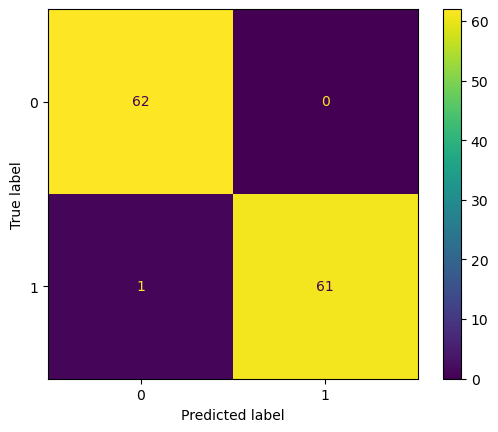

In [76]:
predictions = dt.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [77]:
joblib.dump(dt, './results/monk1/DT/dt_monk1.z')

['./results/monk1/DT/dt_monk1.z']

### Model assesstment

In [78]:
dt_monk1 = joblib.load('./results/monk1/DT/dt_monk1.z')

In [79]:
score1 = dt_monk1.score(x_monk1_ts, y_monk1_ts)

In [80]:
print("Final accuracy on the test set: " + str(score1))

Final accuracy on the test set: 0.9120370370370371


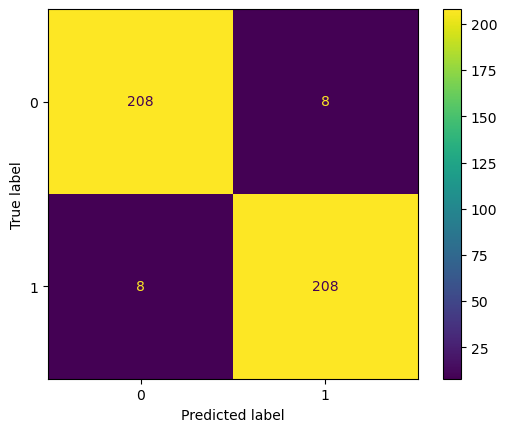

In [48]:
predictions = dt_monk1.predict(x_monk1_ts)

cm = confusion_matrix(y_monk1_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 2

In [49]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk2_tr = pd.read_csv("./dataset/monk2/monks-2.train", sep = " ", skipinitialspace=True, names = colnames)
monk2_tr = monk2_tr.drop('id', axis = 1)

monk2_ts = pd.read_csv("./dataset/monk2/monks-2.test", sep = " ", skipinitialspace=True, names = colnames)
monk2_ts = monk2_ts.drop('id', axis = 1)

In [50]:
x_monk2_tr = monk2_tr.iloc[:, 1:7].values
y_monk2_tr = monk2_tr.iloc[:, 0].values

x_monk2_ts = monk2_ts.iloc[:, 1:7].values
y_monk2_ts = monk2_ts.iloc[:, 0].values

In [51]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk2_tr)
x_monk2_tr = one_hot_encoder_tr.transform(x_monk2_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk2_ts)
x_monk2_ts = one_hot_encoder_ts.transform(x_monk2_ts)

In [59]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0],
              'criterion' :['gini', 'entropy', 'log_loss'],
              'splitter' :['best', 'random'],
              'min_samples_split' :[1, 2, 3]
             }


dt = tree.DecisionTreeClassifier()

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)


grid.fit(x_monk2_tr, y_monk2_tr)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_features=auto, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_features=auto, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criteri

/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 250, in fit
 

In [60]:
dt = tree.DecisionTreeClassifier() # TODO test
dt.fit(x_monk2_tr, y_monk2_tr)

DecisionTreeClassifier()

In [61]:
dt = grid.best_estimator_

train_pred = dt.predict(x_monk2_tr)
test_pred = dt.predict(x_monk2_ts)

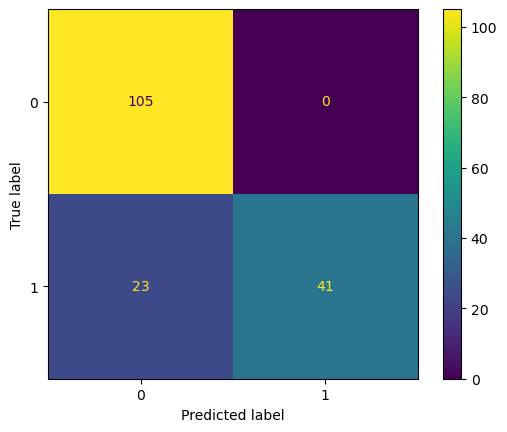

In [62]:
predictions = dt.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [63]:
joblib.dump(dt, './results/monk2/DT/dt_monk2.z')

['./results/monk2/DT/dt_monk2.z']

### Model assesstment

In [64]:
dt_monk2 = joblib.load('./results/monk2/DT/dt_monk2.z')

In [65]:
score2 = dt_monk2.score(x_monk2_ts, y_monk2_ts)

In [66]:
print("Final accuracy on the test set: " + str(score2))

Final accuracy on the test set: 0.7013888888888888


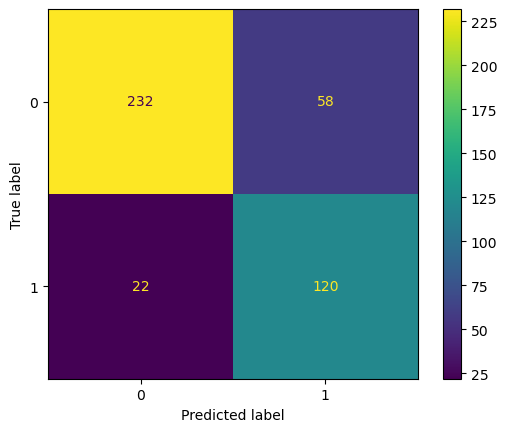

In [23]:
predictions = dt_monk2.predict(x_monk2_ts)

cm = confusion_matrix(y_monk2_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 3

In [44]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk3_tr = pd.read_csv("./dataset/monk3/monks-3.train", sep = " ", skipinitialspace=True, names = colnames)
monk3_tr = monk3_tr.drop('id', axis = 1)

monk3_ts = pd.read_csv("./dataset/monk3/monks-3.test", sep = " ", skipinitialspace=True, names = colnames)
monk3_ts = monk3_ts.drop('id', axis = 1)

In [45]:
x_monk3_tr = monk3_tr.iloc[:, 1:7].values
y_monk3_tr = monk3_tr.iloc[:, 0].values

x_monk3_ts = monk3_ts.iloc[:, 1:7].values
y_monk3_ts = monk3_ts.iloc[:, 0].values

In [46]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk3_tr)
x_monk3_tr = one_hot_encoder_tr.transform(x_monk3_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk3_ts)
x_monk3_ts = one_hot_encoder_ts.transform(x_monk3_ts)

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.2],
              'max_depth' : np.arange(8, 30, 1),
              'criterion' :['gini', 'entropy']
             }


dt = tree.DecisionTreeClassifier()

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)


grid.fit(x_monk3_tr, y_monk3_tr)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

In [47]:
dt = tree.DecisionTreeClassifier() # TODO test
dt.fit(x_monk3_tr, y_monk3_tr)

DecisionTreeClassifier()

In [48]:
# dt = grid.best_estimator_

train_pred = dt.predict(x_monk3_tr)
test_pred = dt.predict(x_monk3_ts)

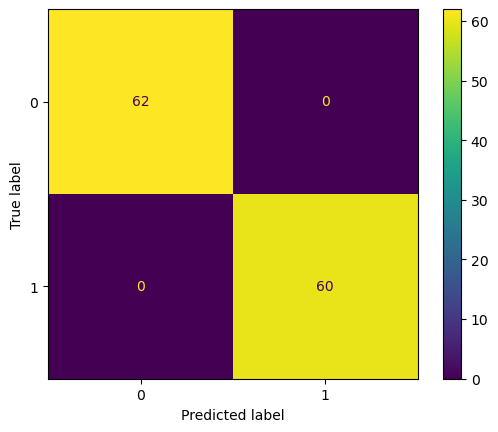

In [49]:
predictions = dt.predict(x_monk3_tr)

cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [50]:
joblib.dump(dt, './results/monk3/DT/dt_monk3.z')

['./results/monk3/DT/dt_monk3.z']

### Model assesstment

In [51]:
dt_monk3 = joblib.load('./results/monk3/DT/dt_monk3.z')

In [52]:
score3 = dt_monk3.score(x_monk3_ts, y_monk3_ts)

In [53]:
print("Final accuracy on the test set: " + str(score3))

Final accuracy on the test set: 0.9375


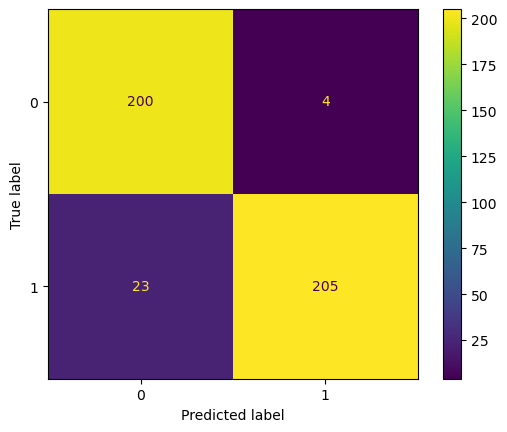

In [54]:
predictions = dt_monk3.predict(x_monk3_ts)

cm = confusion_matrix(y_monk3_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Random forests with scikit

## Monk 1

### Grid Search

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': np.arange(50, 1000, 75)
}

rf = RandomForestClassifier()

grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid.fit(x_monk1_tr, y_monk1_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

In [58]:
rf = RandomForestClassifier() # TODO test
rf.fit(x_monk1_tr, y_monk1_tr)

RandomForestClassifier()

In [59]:
#rf = grid.best_estimator_

train_pred = rf.predict(x_monk1_tr)
test_pred = rf.predict(x_monk1_ts)

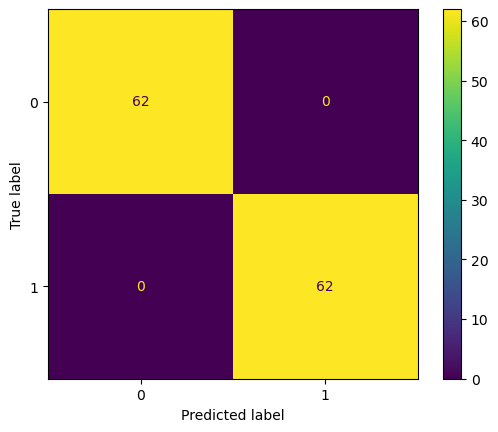

In [60]:
predictions = rf.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Random Hyperparameter Grid Search

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomForestClassifier()

random_grid = RandomizedSearchCV(
    estimator = rf_random,
    param_distributions = random_param_grid,
    n_iter = 100,
    cv = 5,
    verbose=4,
    random_state=42,
    n_jobs = -1
)

random_grid.fit(x_monk1_tr, y_monk1_tr)

In [ ]:
rf = RandomForestClassifier() # TODO test
rf.fit(x_monk2_tr, y_monk2_tr)

In [ ]:
rf_random = random_grid.best_estimator_

train_pred = rf_random.predict(x_monk1_tr)
test_pred = rf_random.predict(x_monk1_ts)

In [ ]:
predictions = rf_random.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection

In [ ]:
joblib.dump(rf_random, './results/monk1/DT/rf_monk1.z')

### Model assesstment

In [ ]:
rf_monk1 = joblib.load('./results/monk1/DT/rf_monk1.z')

In [ ]:
score1 = rf_monk1.score(x_monk1_ts, y_monk1_ts)

In [ ]:
print("Final accuracy on the test set: " + str(score1))

In [ ]:
predictions = rf_monk1.predict(x_monk1_ts)

cm = confusion_matrix(y_monk1_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 2

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': np.arange(50, 1000, 75)
}

rf = RandomForestClassifier()

grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid.fit(x_monk2_tr, y_monk2_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

In [66]:
rf = RandomForestClassifier() # TODO test
rf.fit(x_monk2_tr, y_monk2_tr)

RandomForestClassifier()

In [67]:
# rf = grid.best_estimator_

train_pred = rf.predict(x_monk2_tr)
test_pred = rf.predict(x_monk2_ts)

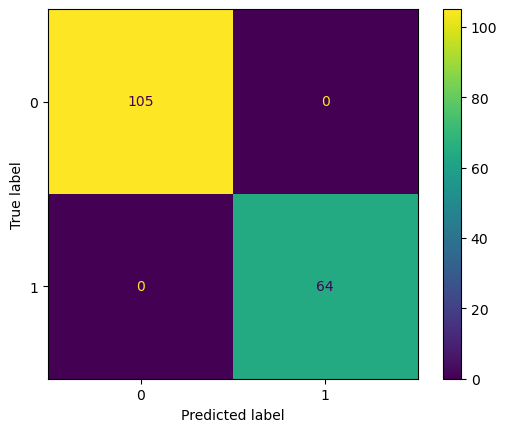

In [68]:
predictions = rf.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Random Hyperparameter Grid Search

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomForestClassifier()

random_grid = RandomizedSearchCV(
    estimator = rf_random,
    param_distributions = random_param_grid,
    n_iter = 100,
    cv = 5,
    verbose=4,
    random_state=42,
    n_jobs = -1
)

random_grid.fit(x_monk2_tr, y_monk2_tr)

In [ ]:
rf_random = random_grid.best_estimator_

train_pred = rf_random.predict(x_monk2_tr)
test_pred = rf_random.predict(x_monk2_ts)

In [ ]:
predictions = rf_random.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model Selection

In [69]:
joblib.dump(rf, './results/monk2/DT/rf_monk2.z')

['./results/monk2/DT/rf_monk2.z']

### Model assesstment

In [70]:
rf_monk2 = joblib.load('./results/monk2/DT/rf_monk2.z')
score2 = rf_monk2.score(x_monk2_ts, y_monk2_ts)
print("Final accuracy on the test set: " + str(score2))

Final accuracy on the test set: 0.75


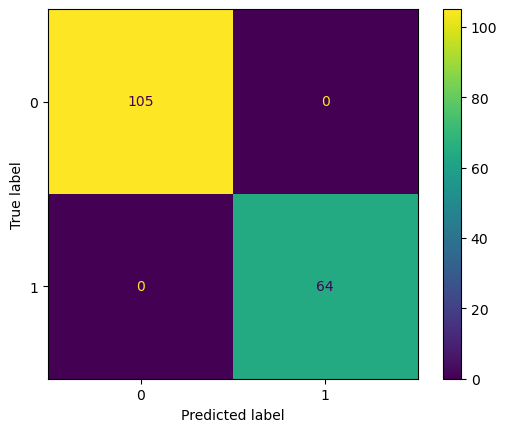

In [72]:
predictions = rf_monk2.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 3

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': np.arange(50, 1000, 75)
}

rf = RandomForestClassifier()

grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid.fit(x_monk3_tr, y_monk3_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

In [ ]:
rf = grid.best_estimator_

train_pred = rf.predict(x_monk3_tr)
test_pred = rf.predict(x_monk3_ts)

In [ ]:
predictions = rf.predict(x_monk3_tr)

cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Random Hyperparameter Grid Search

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomForestClassifier()

random_grid = RandomizedSearchCV(
    estimator = rf_random,
    param_distributions = random_param_grid,
    n_iter = 100,
    cv = 5,
    verbose=4,
    random_state=42,
    n_jobs = -1
)

random_grid.fit(x_monk3_tr, y_monk3_tr)

In [73]:
rf = RandomForestClassifier() # TODO test
rf.fit(x_monk3_tr, y_monk3_tr)

RandomForestClassifier()

In [75]:
#rf_random = random_grid.best_estimator_

train_pred = rf.predict(x_monk3_tr)
test_pred = rf.predict(x_monk3_ts)

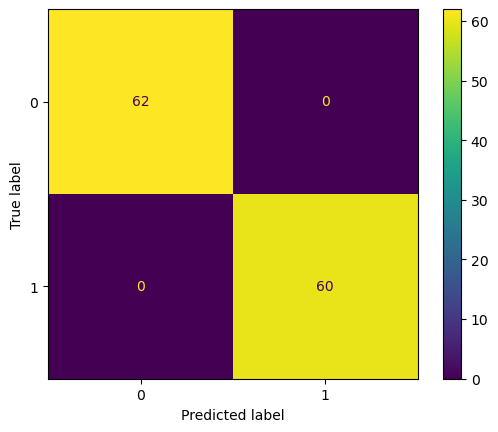

In [77]:
predictions = rf.predict(x_monk3_tr)

cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model Selection

In [78]:
joblib.dump(rf, './results/monk3/DT/rf_monk3.z')

['./results/monk3/DT/rf_monk3.z']

### Model assesstment

In [79]:
rf_monk3 = joblib.load('./results/monk3/DT/rf_monk3.z')
score3 = rf_monk3.score(x_monk3_ts, y_monk3_ts)
print("Final accuracy on the test set: " + str(score3))

Final accuracy on the test set: 0.9606481481481481


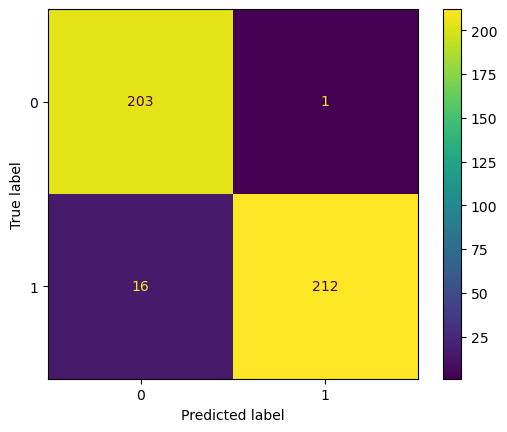

In [83]:
predictions = rf.predict(x_monk3_ts)

cm = confusion_matrix(y_monk3_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()